# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r'train.csv')
df.head()

,col1,col2,output
0,-38.366669,113.000000,1
1,-39.818572,123.943369,1
2,-55.638240,114.551862,1
3,-36.378005,95.616515,1
4,-39.366669,112.000000,1


In [3]:
df['output'].value_counts()

1    770
0    508
Name: output, dtype: int64

In [4]:
df.shape

(1278, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    1278 non-null   float64
 1   col2    1278 non-null   float64
 2   output  1278 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 30.1 KB


In [6]:
df.isnull().sum()

col1      0
col2      0
output    0
dtype: int64

In [16]:
X = df.drop('output',axis = 1)
y= df['output']

In [17]:
X.head()

,col1,col2
0,-38.366669,113.000000
1,-39.818572,123.943369
2,-55.638240,114.551862
3,-36.378005,95.616515
4,-39.366669,112.000000


In [18]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(1278, 2)


# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(standardized_data,y,train_size=0.7,random_state=0)

In [23]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(894, 2) (894,)
(384, 2) (384,)


# Training the data

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [31]:
y_pred = classifier.predict(x_test)

In [32]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.6067708333333334

# svm Linear

In [34]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)

SVC()

In [46]:
classifier = SVC(kernel='linear')  
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [47]:
y_pred = classifier.predict(x_test)

In [48]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.6067708333333334

# svm with RBF

In [52]:
classifier = SVC(kernel='rbf')  
classifier.fit(x_train,y_train)

SVC()

In [53]:
y_pred = classifier.predict(x_test)

In [54]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

1.0

In [71]:
from sklearn.metrics import  confusion_matrix
matrix=metrics.confusion_matrix(y_test, y_pred)
matrix

array([[151,   0],
       [  0, 233]], dtype=int64)

<AxesSubplot:>

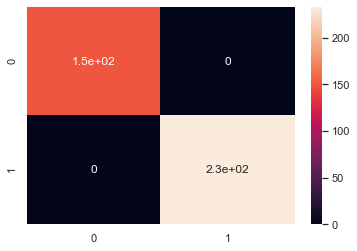

In [75]:
sns.heatmap(matrix,annot=True)

In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       233

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



In [78]:
from pickle import dump

In [82]:
dump(standardized_data,open('standardizer.pkl','wb'))
dump(classifier,open('random_.pkl','wb'))

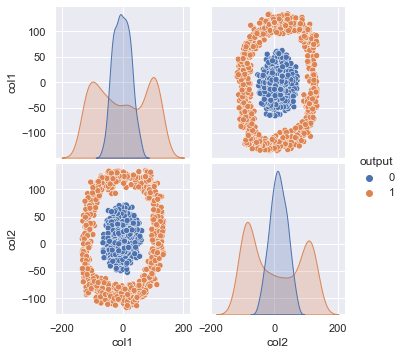

In [77]:
sns.pairplot(df,hue='output')

In [ ]:
sns.bo

In [ ]:
aa